In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

In [8]:
# Specify the file path
thisFile_path = os.path.abspath("")

In [9]:
sch_scr_2018_path = os.path.join(thisFile_path, "Resources for Analysis (Final)", "GTA school score clean DF 2018.csv")
sch_scr_2019_path = os.path.join(thisFile_path, "Resources for Analysis (Final)", "GTA school score clean DF 2019.csv")
sch_scr_2020_path = os.path.join(thisFile_path, "Resources for Analysis (Final)", "GTA school score clean DF 2020.csv")

In [10]:
# Read the mouse data and the study results
sch_scr_2018_data = pd.read_csv(sch_scr_2018_path)
sch_scr_2019_data = pd.read_csv(sch_scr_2019_path)
sch_scr_2020_data = pd.read_csv(sch_scr_2020_path)

In [11]:
sch_scr_2018_data.head()

,Region Name,City Name,School Name,School Score
0,City of Toronto,Toronto,St Michaels Choir,9.4
1,Halton Region,Oakville,Abbey Park,9.2
2,York Region,Thornhill,St Robert,9.2
3,City of Toronto,Toronto,Ursula Franklin,9.1
4,York Region,Markham,Markville,8.9


In [12]:
sch_scr_2019_data.head()

,Region Name,City Name,School Name,School Score
0,Peel Region,Mississauga,Al-Risala,10.0
1,City of Toronto,Toronto,Avondale Alternative,10.0
2,City of Toronto,Toronto,Havergal,10.0
3,Peel Region,Mississauga,IQRA Islamic,10.0
4,Durham Region,Ajax,Islamic Foundation,10.0


In [13]:
sch_scr_2020_data.head()

,Region Name,City Name,School Name,School Score
0,Peel Region,Mississauga,Ahmadiyya,10.0
1,Peel Region,Brampton,Al-Ameen,10.0
2,Halton Region,Oakville,Al-Falah,10.0
3,City of Toronto,Toronto,Avondale Alternative,10.0
4,Peel Region,Mississauga,IQRA Islamic,10.0


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_2018 = sch_scr_2018_data.groupby("Region Name").agg({"School Score": ["mean", "median", "var", "std", "sem"]})
summary_stats_2018

School Score                                     
                        mean median       var       std       sem
Region Name                                                      
City of Toronto     5.833028    5.9  3.725381  1.930124  0.184872
Durham Region       6.324000    6.6  0.691067  0.831304  0.166261
Halton Region       7.440000    7.5  0.855000  0.924662  0.184932
Peel Region         6.439683    6.8  2.872432  1.694825  0.213528
York Region         7.228947    7.2  1.432923  1.197048  0.194187

In [15]:
summary_stats_2019 = sch_scr_2019_data.groupby("Region Name").agg({"School Score": ["mean", "median", "var", "std", "sem"]})
summary_stats_2019

School Score                                     
                        mean median       var       std       sem
Region Name                                                      
City of Toronto     6.362812    6.4  2.766523  1.663287  0.079204
Durham Region       6.482927    6.6  1.980936  1.407457  0.126906
Halton Region       7.123853    7.2  1.160722  1.077368  0.103193
Peel Region         6.736898    6.7  1.724061  1.313035  0.096019
York Region         7.280571    7.2  1.014793  1.007369  0.076150

In [16]:
summary_stats_2020 = sch_scr_2020_data.groupby("Region Name").agg({"School Score": ["mean", "median", "var", "std", "sem"]})
summary_stats_2020

School Score                                     
                        mean median       var       std       sem
Region Name                                                      
City of Toronto     6.451802    6.6  2.755730  1.660039  0.078782
Durham Region       6.437398    6.5  1.659410  1.288181  0.116151
Halton Region       7.100901    7.2  1.507726  1.227895  0.116547
Peel Region         6.664398    6.8  2.268200  1.506054  0.108974
York Region         7.337143    7.4  1.377291  1.173580  0.088714

In [17]:
# Put years into a list for 'for loop' (and later for plot labels)
year_list = ["2018", "2019", "2020"]
region_list = ["City of Toronto", "Durham Region", "Halton Region", "Peel Region", "York Region"]

# Create empty list to fill with school score data (for plotting)
school_score_list_2018 = []
school_score_list_2019 = []
school_score_list_2020 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for region in region_list:    
    # 2018
    region_specific_df_2018 = sch_scr_2018_data[sch_scr_2018_data["Region Name"] == region]
    region_specific_score_2018 = region_specific_df_2018["School Score"]
    school_score_list_2018.append(region_specific_score_2018)
    
        # Determine outliers using upper and lower bounds
    s_quartiles_2018 = region_specific_score_2018.quantile([0.25, 0.5, 0.75])
    lowerQ_2018 = s_quartiles_2018[0.25]
    upperQ_2018 = s_quartiles_2018[0.75]
    IQR_2018 = upperQ_2018 - lowerQ_2018
    Lower_bound_2018 = lowerQ_2018 - (1.5*IQR_2018)
    Upper_bound_2018 = upperQ_2018 + (1.5*IQR_2018)
    Outliers_2018 = region_specific_score_2018.loc[lambda x: (x < Lower_bound_2018) | (x > Upper_bound_2018)]
    print(f"{region}'s potential outliers: {Outliers_2018}")
    
    # 2019
    region_specific_df_2019 = sch_scr_2019_data[sch_scr_2019_data["Region Name"] == region]
    region_specific_score_2019 = region_specific_df_2019["School Score"]
    school_score_list_2019.append(region_specific_score_2019)
    
        # Determine outliers using upper and lower bounds
    s_quartiles_2019 = region_specific_score_2019.quantile([0.25, 0.5, 0.75])
    lowerQ_2019 = s_quartiles_2019[0.25]
    upperQ_2019 = s_quartiles_2019[0.75]
    IQR_2019 = upperQ_2019 - lowerQ_2019
    Lower_bound_2019 = lowerQ_2019 - (1.5*IQR_2019)
    Upper_bound_2019 = upperQ_2019 + (1.5*IQR_2019)
    Outliers_2019 = region_specific_score_2019.loc[lambda x: (x < Lower_bound_2019) | (x > Upper_bound_2019)]
    print(f"{region}'s potential outliers: {Outliers_2019}")
    
    # 2020
    region_specific_df_2020 = sch_scr_2020_data[sch_scr_2020_data["Region Name"] == region]
    region_specific_score_2020 = region_specific_df_2020["School Score"]
    school_score_list_2020.append(region_specific_score_2020)
    
        # Determine outliers using upper and lower bounds
    s_quartiles_2020 = region_specific_score_2020.quantile([0.25, 0.5, 0.75])
    lowerQ_2020 = s_quartiles_2020[0.25]
    upperQ_2020 = s_quartiles_2020[0.75]
    IQR_2020 = upperQ_2020 - lowerQ_2020
    Lower_bound_2020 = lowerQ_2020 - (1.5*IQR_2020)
    Upper_bound_2020 = upperQ_2020 + (1.5*IQR_2020)
    Outliers_2020 = region_specific_score_2020.loc[lambda x: (x < Lower_bound_2020) | (x > Upper_bound_2020)]
    print(f"{region}'s potential outliers: {Outliers_2020}")

City of Toronto's potential outliers: 257    0.0
Name: School Score, dtype: float64
City of Toronto's potential outliers: 1033    1.6
1034    0.7
Name: School Score, dtype: float64
City of Toronto's potential outliers: 1040    1.9
1041    1.6
1042    0.0
1043    0.0
Name: School Score, dtype: float64
Durham Region's potential outliers: Series([], Name: School Score, dtype: float64)
Durham Region's potential outliers: 4       10.0
1010     3.5
1011     3.4
1020     2.9
1023     2.7
1024     2.7
1029     2.3
Name: School Score, dtype: float64
Durham Region's potential outliers: Series([], Name: School Score, dtype: float64)
Halton Region's potential outliers: Series([], Name: School Score, dtype: float64)
Halton Region's potential outliers: 988    3.9
Name: School Score, dtype: float64
Halton Region's potential outliers: 2       10.0
13      10.0
965      4.4
987      4.2
993      4.1
1006     3.7
1009     3.7
Name: School Score, dtype: float64
Peel Region's potential outliers: 247    3.

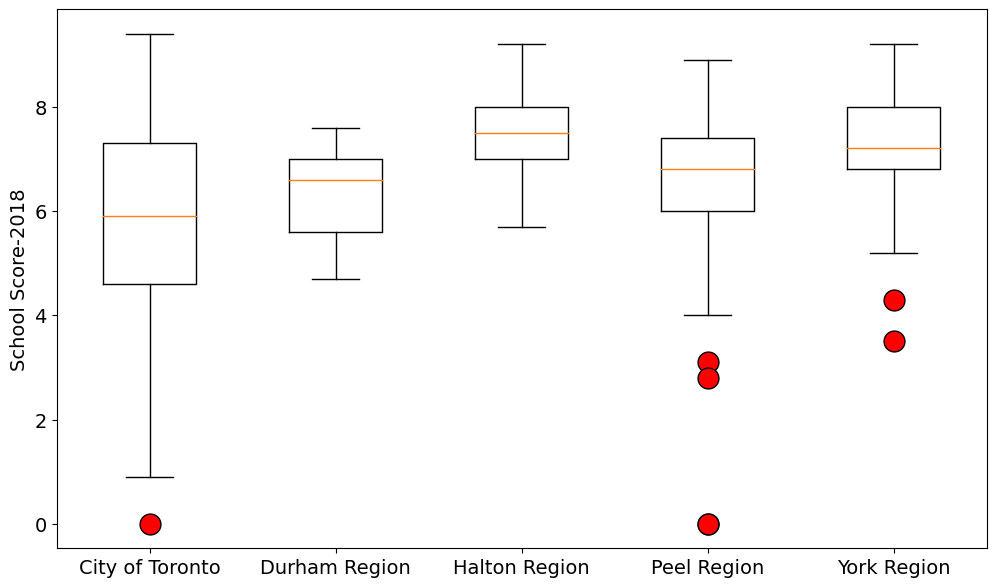

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import numpy as np
plt.figure(figsize=(12,7))
plt.boxplot(school_score_list_2018, labels = region_list, 
            flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'red'})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('School Score-2018', fontsize = 14)
plt.show()

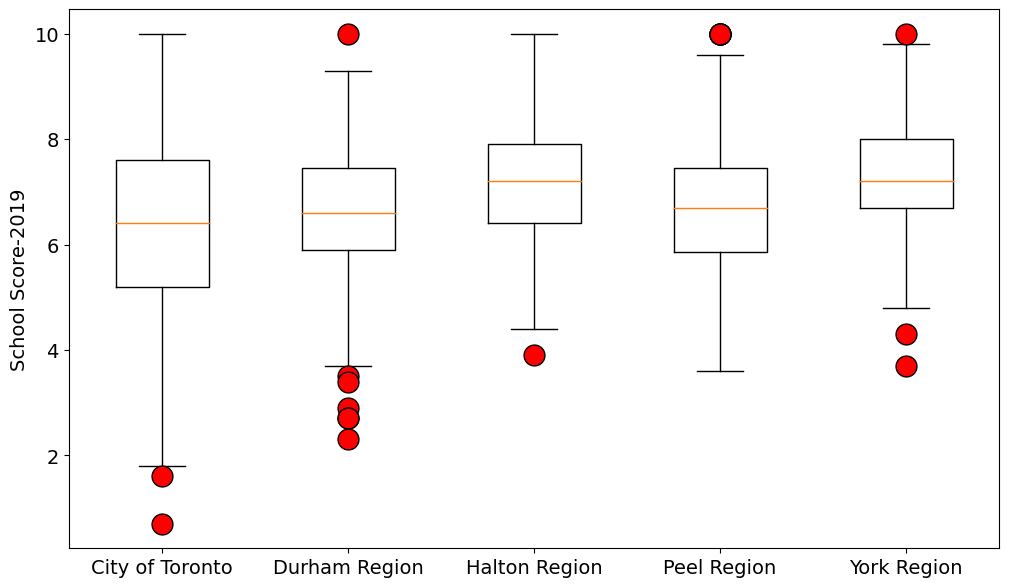

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import numpy as np
plt.figure(figsize=(12,7))
plt.boxplot(school_score_list_2019, labels = region_list, 
            flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'red'})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('School Score-2019', fontsize = 14)
plt.show()

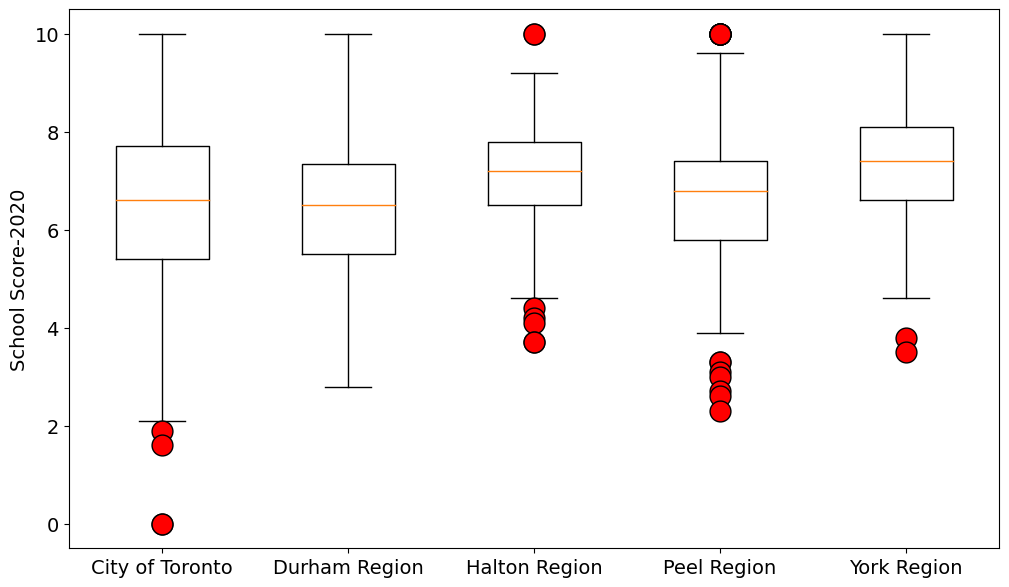

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import numpy as np
plt.figure(figsize=(12,7))
plt.boxplot(school_score_list_2020, labels = region_list, 
            flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'red'})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('School Score-2020', fontsize = 14)
plt.show()